# Setup

## Imports

In [1]:
import pandas as pd
import json
from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.core import Composition
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

/Users/jayeshzambre/anaconda3/envs/samvid/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [2]:
with open('matbench_steels.json', 'r') as f:
    data = json.load(f)
    data = pd.DataFrame(data['data'], columns=data['columns'], index=data['index'])
data = StrToComposition(target_col_id='composition_obj').featurize_dataframe(
    data, 'composition', ignore_errors=True)
features = [cf.ElementProperty.from_preset("magpie")]
feature_labels = MultipleFeaturizer(features).feature_labels()
data = MultipleFeaturizer(features).featurize_dataframe(
    data, col_id='composition_obj', ignore_errors=False);     

MultipleFeaturizer: 100%|██████████| 312/312 [00:08<00:00, 37.28it/s]


# Explore Dataset

### A. Datset overview

In [3]:
data.head(5)

,composition,yield strength,composition_obj,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,2411.5,"(Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)",6.0,42.0,36.0,26.664769,1.152116,26.0,43.0,...,2.110663,1.648909,0.572542,2.110663,194.0,229.0,35.0,222.420512,9.409624,229.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,1123.1,"(Fe, C, Mn, Si, Cr, Ni, Mo, V, N, Nb, Co, W, Al)",6.0,74.0,68.0,26.300744,1.522817,26.0,46.0,...,2.110663,1.606402,0.628422,2.110663,194.0,229.0,35.0,222.057381,11.123311,229.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,1736.3,"(Fe, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)",13.0,42.0,29.0,26.145400,0.858372,26.0,43.0,...,2.110663,1.600877,0.637435,2.110663,194.0,229.0,35.0,223.594029,8.212745,229.0
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,2487.3,"(Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)",6.0,42.0,36.0,26.743298,1.235479,26.0,43.0,...,2.110663,1.668280,0.561291,2.110663,194.0,229.0,35.0,222.541850,9.377819,229.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,2249.6,"(Fe, C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti)",6.0,42.0,36.0,26.526613,0.958219,26.0,43.0,...,2.110663,1.677256,0.551281,2.110663,194.0,229.0,35.0,222.528371,9.298562,229.0


In [4]:
data.shape

(312, 135)

In [5]:
data.isna().sum().sum()

0

In [6]:
data.describe()

,yield strength,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.0,312.000000,312.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,312.0,312.0,312.0,312.000000,312.000000,312.0
mean,1420.998397,6.564103,43.641026,37.076923,26.105889,1.088643,26.0,44.134615,78.551282,34.416667,...,2.110663,1.690852,0.608569,2.110663,194.0,229.0,35.0,226.002164,4.914197,229.0
std,301.894169,1.903388,7.069657,7.349815,0.350181,0.287931,0.0,1.476881,1.381061,1.552752,...,0.000000,0.065837,0.078327,0.000000,0.0,0.0,0.0,2.050134,3.273260,0.0
min,1005.900000,6.000000,42.000000,29.000000,24.938127,0.547254,26.0,43.000000,78.000000,29.000000,...,2.110663,1.542328,0.328321,2.110663,194.0,229.0,35.0,221.987519,0.753503,229.0
25%,1219.475000,6.000000,42.000000,36.000000,25.845897,0.886457,26.0,43.000000,78.000000,32.000000,...,2.110663,1.641123,0.554898,2.110663,194.0,229.0,35.0,224.077529,1.075239,229.0
50%,1344.200000,6.000000,42.000000,36.000000,26.095538,1.075613,26.0,43.000000,78.000000,35.000000,...,2.110663,1.680408,0.608405,2.110663,194.0,229.0,35.0,225.747233,5.115655,229.0
75%,1576.075000,6.000000,42.000000,36.000000,26.292856,1.245343,26.0,46.000000,78.000000,35.000000,...,2.110663,1.748192,0.663590,2.110663,194.0,229.0,35.0,228.383256,8.281043,229.0
max,2510.300000,13.000000,74.000000,68.000000,26.974363,2.815181,26.0,49.000000,82.000000,39.000000,...,2.110663,1.919852,0.816311,2.110663,194.0,229.0,35.0,228.607210,11.123311,229.0


### B. Target Variable Analysis (yield strength)


In [7]:
print("\n" + "="*50)
print("YIELD STRENGTH ANALYSIS")
print("="*50)
yield_stats = data['yield strength'].describe()
print(yield_stats)


YIELD STRENGTH ANALYSIS
count     312.000000
mean     1420.998397
std       301.894169
min      1005.900000
25%      1219.475000
50%      1344.200000
75%      1576.075000
max      2510.300000
Name: yield strength, dtype: float64


In [8]:
# Check for outliers
Q1 = data['yield strength'].quantile(0.25)
Q3 = data['yield strength'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['yield strength'] < Q1 - 1.5*IQR) | (data['yield strength'] > Q3 + 1.5*IQR)]
print(f"\nOutliers detected: {len(outliers)} samples")
if len(outliers) > 0:
    print("Outlier yield strengths:")
    outlier_values = sorted(outliers['yield strength'].values)
    print(f"  Low outliers: {[x for x in outlier_values if x < Q1 - 1.5*IQR]}")
    print(f"  High outliers: {[x for x in outlier_values if x > Q3 + 1.5*IQR]}")


Outliers detected: 13 samples
Outlier yield strengths:
  Low outliers: []
  High outliers: [2157.3, 2249.6, 2331.1, 2356.4, 2372.4, 2381.6, 2381.6, 2402.3, 2411.5, 2411.5, 2487.3, 2501.1, 2510.3]


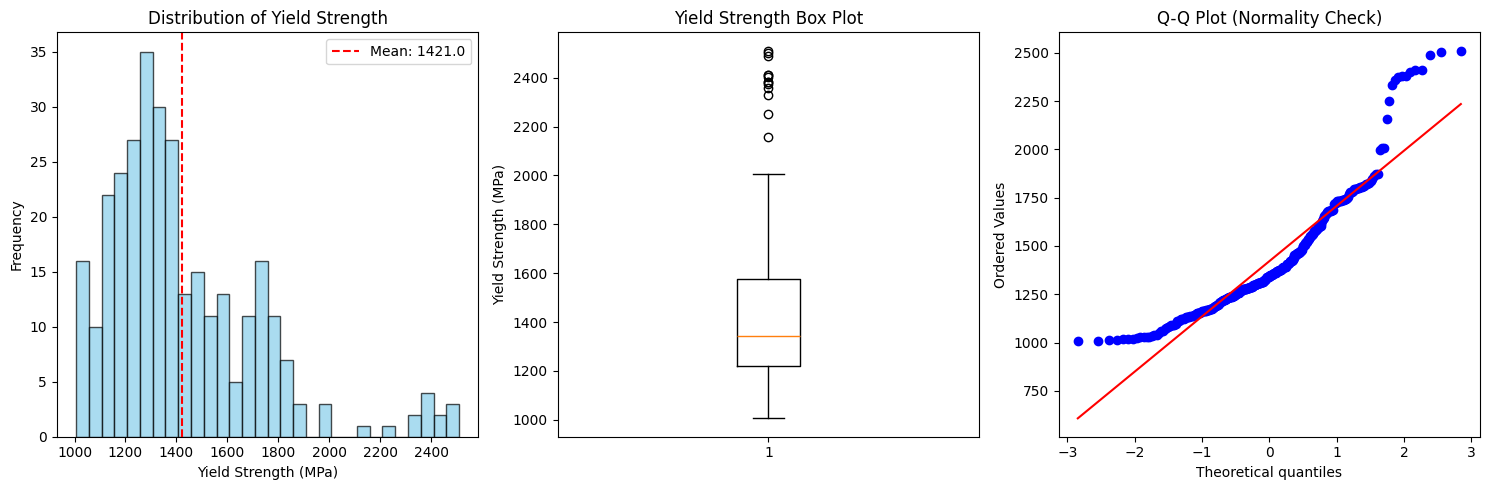

In [9]:
# 1. Yield strength distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(data['yield strength'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Yield Strength (MPa)')
plt.ylabel('Frequency')
plt.title('Distribution of Yield Strength')
plt.axvline(data['yield strength'].mean(), color='red', linestyle='--', 
            label=f'Mean: {data["yield strength"].mean():.1f}')
plt.legend()

plt.subplot(1, 3, 2)
plt.boxplot(data['yield strength'])
plt.ylabel('Yield Strength (MPa)')
plt.title('Yield Strength Box Plot')

plt.subplot(1, 3, 3)
stats.probplot(data['yield strength'], dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Check)')

plt.tight_layout()
#plt.savefig('yield_strength_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### C. Element Composition Analysis

In [10]:
# ===== COMPOSITION ANALYSIS =====
from pymatgen.core import Composition

print("\n" + "="*50)
print("COMPOSITION ANALYSIS")
print("="*50)

# Extract elemental compositions
compositions = []
for comp_str in data['composition']:
    comp = Composition(comp_str)
    compositions.append(comp.fractional_composition.as_dict())

# Convert to DataFrame
comp_df = pd.DataFrame(compositions).fillna(0)
print(f"Elements found: {list(comp_df.columns)}")
print(f"\nElemental composition statistics:")
print(comp_df.describe())


COMPOSITION ANALYSIS
Elements found: ['Fe', 'C', 'Mn', 'Si', 'Cr', 'Ni', 'Mo', 'V', 'Nb', 'Co', 'Al', 'Ti', 'N', 'W']

Elemental composition statistics:
               Fe           C          Mn          Si          Cr          Ni  \
count  312.000000  312.000000  312.000000  312.000000  312.000000  312.000000   
mean     0.729826    0.004498    0.001485    0.004335    0.086464    0.078559   
std      0.051467    0.005089    0.003994    0.011229    0.058074    0.061217   
min      0.619964    0.000000    0.000099    0.000197    0.000102    0.000095   
25%      0.685286    0.000474    0.000102    0.000200    0.033497    0.009079   
50%      0.722200    0.001410    0.000104    0.000205    0.097191    0.080903   
75%      0.770899    0.008597    0.000820    0.002203    0.133979    0.116267   
max      0.860334    0.020106    0.030009    0.089978    0.185966    0.202841   

               Mo           V          Nb          Co          Al          Ti  \
count  312.000000  312.000000  312.

In [11]:
# ===== ELEMENT-YIELD STRENGTH CORRELATIONS =====
print("\n" + "="*50)
print("ELEMENT-YIELD STRENGTH CORRELATIONS")
print("="*50)

# Add yield strength to composition dataframe
comp_analysis = comp_df.copy()
comp_analysis['yield_strength'] = data['yield strength'].values

# Calculate correlations
correlations = comp_analysis.corr()['yield_strength'].drop('yield_strength').sort_values(key=abs, ascending=False)
print("Element correlations with yield strength:")
for element, corr in correlations.items():
    print(f"{element:>2}: {corr:>7.3f}")


ELEMENT-YIELD STRENGTH CORRELATIONS
Element correlations with yield strength:
Ti:   0.511
Cr:  -0.409
Ni:   0.257
Co:   0.205
 V:   0.201
Mn:  -0.173
 C:   0.149
Fe:  -0.146
Si:  -0.133
 N:  -0.117
Mo:   0.066
Al:  -0.034
Nb:   0.032
 W:  -0.026


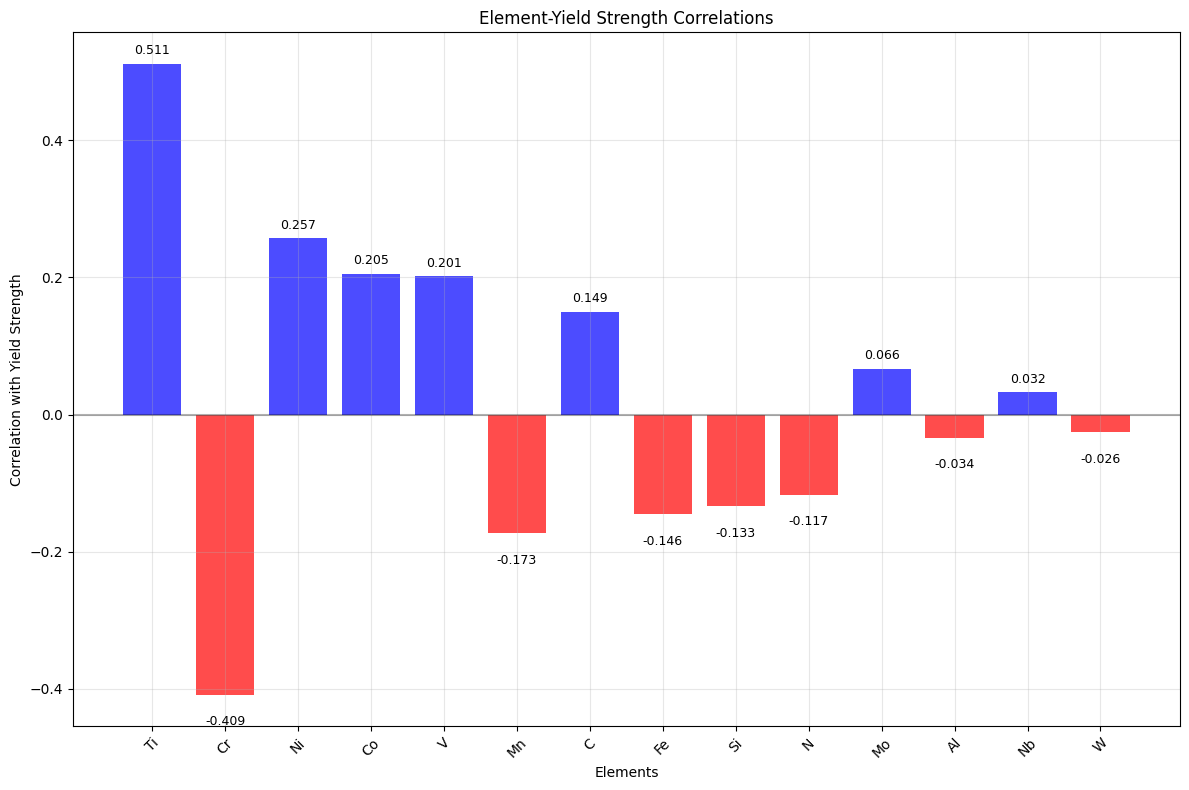

In [12]:
# 2. Element correlations
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in correlations.values]
bars = plt.bar(range(len(correlations)), correlations.values, color=colors, alpha=0.7)
plt.xlabel('Elements')
plt.ylabel('Correlation with Yield Strength')
plt.title('Element-Yield Strength Correlations')
plt.xticks(range(len(correlations)), correlations.index, rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

# Add correlation values on bars
for i, (bar, corr) in enumerate(zip(bars, correlations.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.01 if corr > 0 else -0.03), 
                f'{corr:.3f}', ha='center', va='bottom' if corr > 0 else 'top', fontsize=9)

plt.tight_layout()
#plt.savefig('element_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

### D. Feature Correlation Analysis

In [13]:
# ===== TOP FEATURE CORRELATIONS =====
print("\n" + "="*50)
print("TOP FEATURE CORRELATIONS WITH YIELD STRENGTH")
print("="*50)

# Get feature data
feature_data = data[feature_labels]
# Calculate correlations with yield strength
feature_correlations = feature_data.corrwith(data['yield strength']).sort_values(key=abs, ascending=False)

# Display top 15 correlations
print("Top 15 features correlated with yield strength:")
top_15_features = feature_correlations.head(15)
for i, (feature, corr) in enumerate(top_15_features.items(), 1):
    clean_name = feature.replace('MagpieData ', '')
    print(f"{i:>2}. {clean_name:<45}: {corr:>7.3f}")


TOP FEATURE CORRELATIONS WITH YIELD STRENGTH
Top 15 features correlated with yield strength:
 1. mean Electronegativity                       :   0.421
 2. avg_dev NsValence                            :  -0.397
 3. avg_dev NsUnfilled                           :  -0.397
 4. mean NsValence                               :   0.391
 5. mean NsUnfilled                              :  -0.391
 6. avg_dev NdValence                            :   0.385
 7. mean NUnfilled                               :  -0.359
 8. avg_dev CovalentRadius                       :   0.356
 9. mean NValence                                :   0.352
10. avg_dev NdUnfilled                           :   0.340
11. mean Column                                  :   0.328
12. avg_dev GSmagmom                             :  -0.323
13. mean NdValence                               :   0.321
14. mean MendeleevNumber                         :   0.314
15. mean CovalentRadius                          :  -0.312


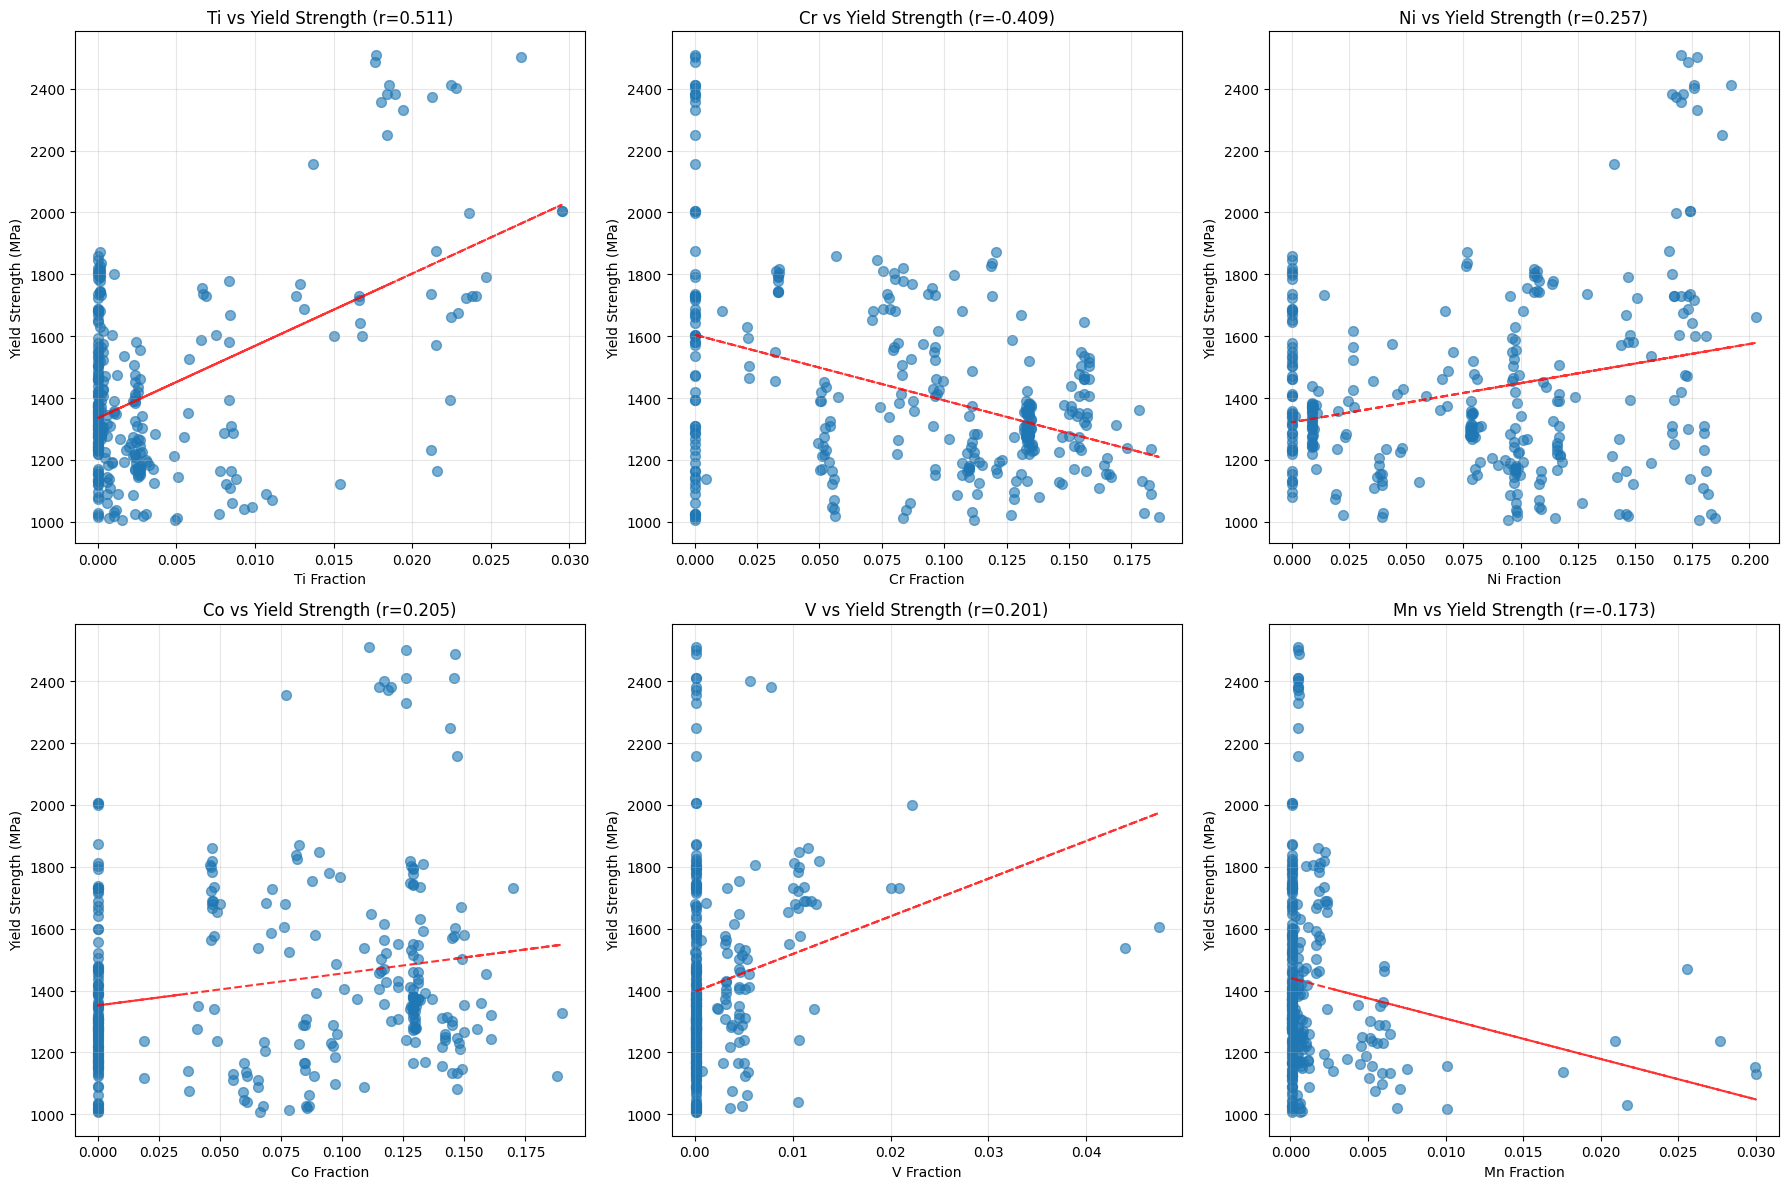


Data exploration complete! Visualizations saved as PNG files.
Key findings:
- Dataset has 312 samples with 132 features
- Yield strength ranges from 1005.9 to 2510.3 MPa
- Most correlated elements: Ti, Cr, Ni
- Most correlated features: mean Electronegativity, avg_dev NsValence, avg_dev NsUnfilled


In [14]:
# 4. Scatter plots for top correlated elements
top_elements = correlations.abs().nlargest(6).index

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, element in enumerate(top_elements):
    axes[i].scatter(comp_df[element], data['yield strength'], alpha=0.6, s=50)
    axes[i].set_xlabel(f'{element} Fraction')
    axes[i].set_ylabel('Yield Strength (MPa)')
    axes[i].set_title(f'{element} vs Yield Strength (r={correlations[element]:.3f})')
    
    # Add trend line
    z = np.polyfit(comp_df[element], data['yield strength'], 1)
    p = np.poly1d(z)
    axes[i].plot(comp_df[element], p(comp_df[element]), "r--", alpha=0.8)
    
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig('element_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nData exploration complete! Visualizations saved as PNG files.")
print("Key findings:")
print(f"- Dataset has {len(data)} samples with {len(feature_labels)} features")
print(f"- Yield strength ranges from {data['yield strength'].min():.1f} to {data['yield strength'].max():.1f} MPa")
print(f"- Most correlated elements: {', '.join(correlations.abs().nlargest(3).index)}")
print(f"- Most correlated features: {', '.join([f.replace('MagpieData ', '') for f in feature_correlations.abs().nlargest(3).index])}")

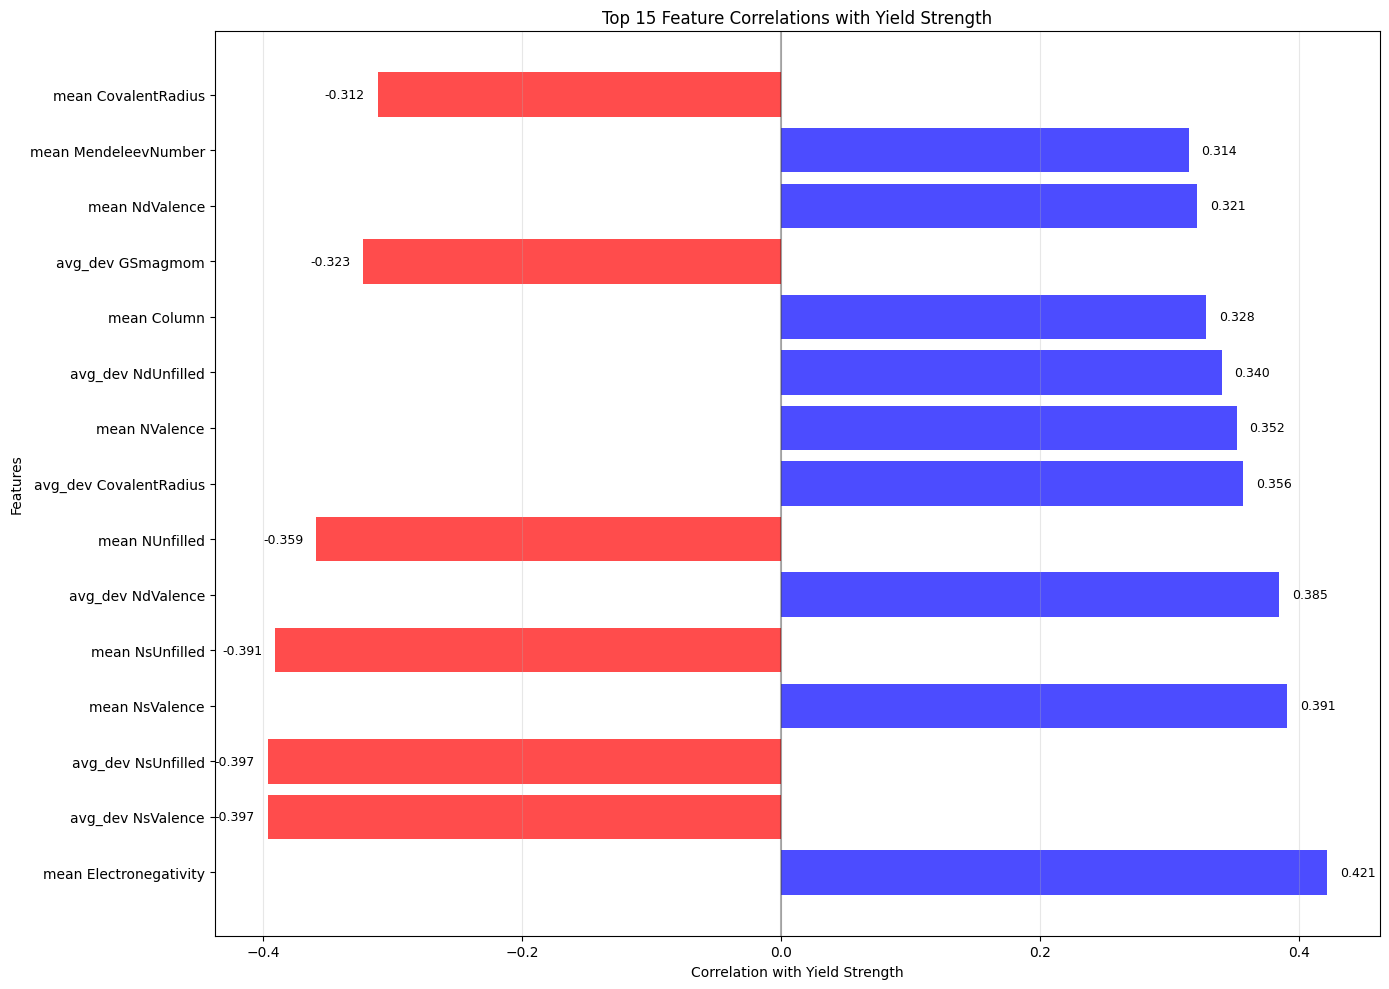

In [15]:
# 3. Top feature correlations
plt.figure(figsize=(14, 10))
top_15 = feature_correlations.head(15)
colors = ['red' if x < 0 else 'blue' for x in top_15.values]
bars = plt.barh(range(len(top_15)), top_15.values, color=colors, alpha=0.7)
plt.ylabel('Features')
plt.xlabel('Correlation with Yield Strength')
plt.title('Top 15 Feature Correlations with Yield Strength')
plt.yticks(range(len(top_15)), [f.replace('MagpieData ', '') for f in top_15.index])
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3, axis='x')

# Add correlation values
for i, (bar, corr) in enumerate(zip(bars, top_15.values)):
    plt.text(bar.get_width() + (0.01 if corr > 0 else -0.01), bar.get_y() + bar.get_height()/2, 
                f'{corr:.3f}', ha='left' if corr > 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
#plt.savefig('feature_correlations.png', dpi=300, bbox_inches='tight')
plt.show()

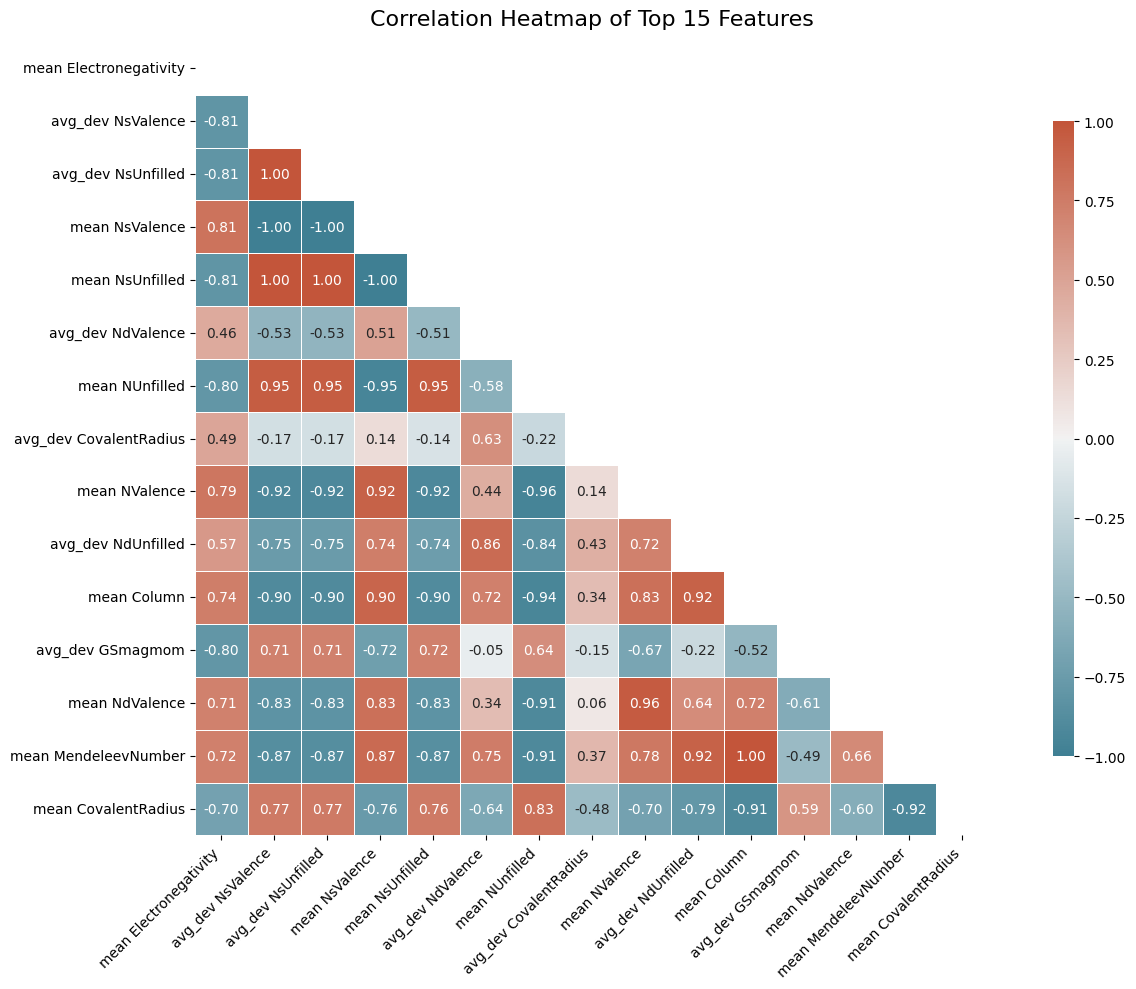

In [16]:
# Prepare the data
top_15_feature_names = feature_correlations.head(15).index.tolist()
top_15_data = feature_data[top_15_feature_names]
# Remove "MagpieData " prefix from all columns
top_15_data.columns = top_15_data.columns.str.replace('MagpieData ', '', regex=False)

corr_matrix = top_15_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Create a diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=0.5,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.8, "aspect": 30}
)

plt.title("Correlation Heatmap of Top 15 Features", fontsize=16, pad=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
#plt.savefig('feature_correlations_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# ===== KEY INSIGHTS SUMMARY =====
print("\n" + "="*50)
print("KEY INSIGHTS SUMMARY")
print("="*50)
print(f"\n1. DATASET OVERVIEW:")
print(f"   - {len(data)} steel samples with yield strength ranging from {data['yield strength'].min():.1f} to {data['yield strength'].max():.1f} MPa")
print(f"   - Mean yield strength: {data['yield strength'].mean():.1f} MPa")
print(f"   - Standard deviation: {data['yield strength'].std():.1f} MPa")
print(f"   - {len(feature_labels)} engineered features from composition")

print(f"\n2. ELEMENTAL COMPOSITION:")
print(f"   - Primary element: Fe (iron) - {comp_df['Fe'].mean():.1%} average")
print(f"   - Key alloying elements: {', '.join([col for col in comp_df.columns if col != 'Fe'])}")

print(f"\n3. STRONGEST ELEMENT CORRELATIONS:")
top_3_elements = correlations.abs().nlargest(3)
for element, corr in top_3_elements.items():
    direction = "increases" if correlations[element] > 0 else "decreases"
    print(f"   - {element}: {corr:.3f} (yield strength {direction} with {element} content)")

print(f"\n4. STRONGEST FEATURE CORRELATIONS:")
top_3_features = feature_correlations.abs().nlargest(3)
for feature, corr in top_3_features.items():
    clean_name = feature.replace('MagpieData ', '')
    print(f"   - {clean_name}: {corr:.3f}")

print(f"\n5. DATA QUALITY:")
print(f"   - No missing values in features")
print(f"   - {len(outliers)} outliers detected in yield strength")
print(f"   - Data appears suitable for machine learning")

print(f"\n6. MODELING CONSIDERATIONS:")
print(f"   - High dimensionality: {len(feature_labels)} features for {len(data)} samples")
print(f"   - Consider feature selection/dimensionality reduction")
print(f"   - Cross-validation essential due to limited sample size")
print(f"   - Non-linear relationships likely important")


KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   - 312 steel samples with yield strength ranging from 1005.9 to 2510.3 MPa
   - Mean yield strength: 1421.0 MPa
   - Standard deviation: 301.9 MPa
   - 132 engineered features from composition

2. ELEMENTAL COMPOSITION:
   - Primary element: Fe (iron) - 73.0% average
   - Key alloying elements: C, Mn, Si, Cr, Ni, Mo, V, Nb, Co, Al, Ti, N, W

3. STRONGEST ELEMENT CORRELATIONS:
   - Ti: 0.511 (yield strength increases with Ti content)
   - Cr: 0.409 (yield strength decreases with Cr content)
   - Ni: 0.257 (yield strength increases with Ni content)

4. STRONGEST FEATURE CORRELATIONS:
   - mean Electronegativity: 0.421
   - avg_dev NsValence: 0.397
   - avg_dev NsUnfilled: 0.397

5. DATA QUALITY:
   - No missing values in features
   - 13 outliers detected in yield strength
   - Data appears suitable for machine learning

6. MODELING CONSIDERATIONS:
   - High dimensionality: 132 features for 312 samples
   - Consider feature selection/dimensio

# Build Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Train/Test Split
X = comp_df
y = data['yield strength']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 2: Scaling (fit only on train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


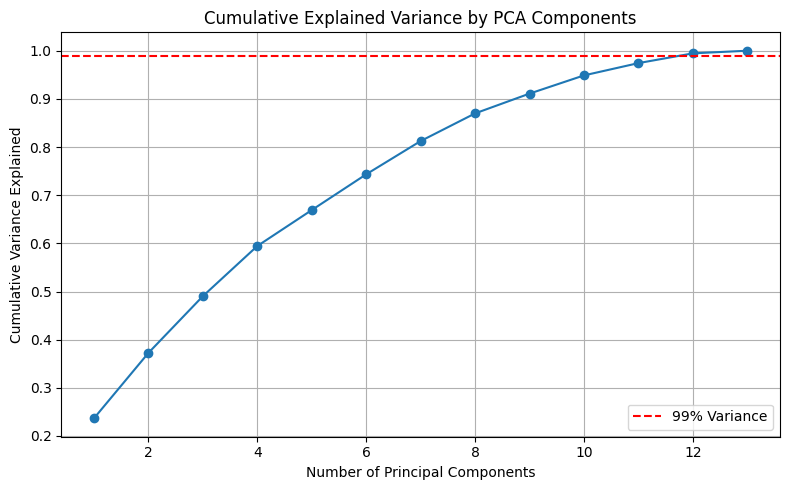

Number of PCA components to retain 99% variance: 13
Top contributing features to PC1:
Ni    0.510735
Cr    0.396463
C     0.379267
Ti    0.364988
Co    0.328243
N     0.263039
Fe    0.233626
Al    0.196255
Mo    0.119847
Mn    0.093227
Name: 0, dtype: float64


In [19]:
# Step 3: PCA (fit only on train)
pca = PCA(n_components=0.999)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

#Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.99, color='r', linestyle='--', label='99% Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Output: number of components retained
print(f"Number of PCA components to retain 99% variance: {X_train_pca.shape[1]}")


# Get feature names (after renaming "MagpieData " prefix earlier)
original_features = comp_df.columns

# Access PCA components (loadings)
# Each row is a principal component; each column corresponds to an original feature
loadings = pd.DataFrame(pca.components_, columns=original_features)

# Example: Top contributing features for the 1st principal component
top_features_pc1 = loadings.iloc[0].abs().sort_values(ascending=False).head(10)
print("Top contributing features to PC1:")
print(top_features_pc1)


### Model-1: Linear Regression with Ridge

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import uniform, loguniform
import numpy as np

# Define parameter distributions for Ridge regression
param_dist = {
    'alpha': loguniform(1e-4, 1e2),  # Regularization strength (log scale)
    'fit_intercept': [True, False],  # Whether to fit intercept
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [1000, 2000, 3000, 5000]  # Maximum iterations for iterative solvers
}

# Initialize Ridge model
ridge = Ridge(random_state=42)

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training set
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found:", random_search.best_params_)

# Evaluate best model on test set
best_ridge = random_search.best_estimator_
y_pred_train = best_ridge.predict(X_train_scaled)

# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)
train_mape = mean_absolute_percentage_error(y_train,y_pred_train)

print("\n=== Ridge Regression Results ===")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Training MAPE Score: {train_mape:.4f}")
print(f"Training R² Score: {train_r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'alpha': 36.30389268523312, 'fit_intercept': True, 'max_iter': 5000, 'solver': 'saga'}

=== Ridge Regression Results ===
Training RMSE: 211.9319
Training MAE: 152.8630
Training MAPE Score: 0.1080
Training R² Score: 0.5111


### Model-2: Random Forest-Regrex Steel

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define parameter distributions
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt']
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Try 20 random combinations
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training set
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found:", random_search.best_params_)

# Evaluate best model on test set
best_rf = random_search.best_estimator_
y_pred_train = best_rf.predict(X_train_scaled)
# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print("\n=== Random Forest Results ===")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Training MAPE Score: {train_mape:.4f}")
print(f"Training R² Score: {train_r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 206}

=== Random Forest Results ===
Training RMSE: 51.8546
Training MAE: 36.3046
Training MAPE Score: 0.0260
Training R² Score: 0.9707


### Model-3: XGboost-Regrex Steel

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

# Define parameter distributions for XGBoost
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.5)
}

# Initialize model
xgb = XGBRegressor(random_state=42)

# Set up randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 random combinations
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit on training set
random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found:", random_search.best_params_)

# Evaluate best model on test set
best_xgb = random_search.best_estimator_
y_pred_train = best_xgb.predict(X_train_scaled)
# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print("\n=== XGBoost Results ===")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Training MAPE Score: {train_mape:.4f}")
print(f"Training R² Score: {train_r2:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'colsample_bytree': 0.6399899663272012, 'gamma': 0.22962444598293358, 'learning_rate': 0.11011258334170654, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 51, 'subsample': 0.8887995089067299}

=== XGBoost Results ===
Training RMSE: 49.2608
Training MAE: 36.0411
Training MAPE Score: 0.0264
Training R² Score: 0.9736


### Model-4: TPOT Regressor-MAT

In [23]:
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Very basic TPOT configuration - remove problematic parameters
tpot = TPOTRegressor(
    generations=20,      # Reduced for faster testing
    population_size=20,  # Reduced for faster testing
    cv=3,               # Reduced CV folds
    random_state=42,
    verbose=1,          # Reduced verbosity
    n_jobs=1            # Single job to avoid issues
)

# Fit TPOT
print("Starting TPOT optimization...")
tpot.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = tpot.predict(X_train_scaled)
# Training metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mape = mean_absolute_percentage_error(y_train,y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

print("\n=== TPOT Results ===")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")
print(f"Training MAPE Score: {train_mape:.4f}")
print(f"Training R² Score: {train_r2:.4f}")

Starting TPOT optimization...


Generation: 100%|██████████| 20/20 [06:38<00:00, 19.93s/it]



=== TPOT Results ===
Training RMSE: 53.3497
Training MAE: 37.3967
Training MAPE Score: 0.0259
Training R² Score: 0.9690


# Evaluate Model

In [24]:
def evaluate_model_comprehensive(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """Comprehensive evaluation of train and test performance"""
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Metrics calculation
    metrics = {
        'Train': {
            'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'MAE': mean_absolute_error(y_train, y_train_pred),
            'R²': r2_score(y_train, y_train_pred),
            'MAPE': mean_absolute_percentage_error(y_train,y_train_pred)
        },
        'Test': {
            'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
            'MAE': mean_absolute_error(y_test, y_test_pred),
            'R²': r2_score(y_test, y_test_pred),
            'MAPE': mean_absolute_percentage_error(y_test,y_test_pred)
        }
    }
    
    # Print results
    print(f"=========== {model_name.upper()} EVALUATION ==========")
    print(f"{'Metric':<10} {'Train':<12} {'Test':<12} {'Difference':<12}")
    print("-" * 50)
    
    for metric in ['RMSE', 'MAE', 'R²', 'MAPE']:
        train_val = metrics['Train'][metric]
        test_val = metrics['Test'][metric]
        diff = test_val - train_val if metric != 'R²' else train_val - test_val
        
        print(f"{metric:<10} {train_val:<12.4f} {test_val:<12.4f} {diff:<12.4f}")
    
    # Overfitting analysis
    print(f"\n=== OVERFITTING ANALYSIS ===")
    rmse_ratio = metrics['Test']['RMSE'] / metrics['Train']['RMSE']
    r2_diff = metrics['Train']['R²'] - metrics['Test']['R²']
    
    print(f"RMSE Ratio (Test/Train): {rmse_ratio:.3f}")
    print(f"R² Drop (Train - Test): {r2_diff:.3f}")
    
    return metrics, y_train_pred, y_test_pred


### Linear Ridge Regressor Validation

In [25]:
# Usage
metrics, y_train_pred, y_test_pred = evaluate_model_comprehensive(
    best_ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regressor"
)

=========== RIDGE REGRESSOR EVALUATION ==========
Metric     Train        Test         Difference  
--------------------------------------------------
RMSE       211.9319     217.3383     5.4064      
MAE        152.8630     142.1621     -10.7010    
R²         0.5111       0.4199       0.0912      
MAPE       0.1080       0.0976       -0.0104     

=== OVERFITTING ANALYSIS ===
RMSE Ratio (Test/Train): 1.026
R² Drop (Train - Test): 0.091


### Random Forest Regressor Validation

In [26]:
# Usage
metrics, y_train_pred, y_test_pred = evaluate_model_comprehensive(
    best_rf, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest Regressor"
)

=========== RANDOM FOREST REGRESSOR EVALUATION ==========
Metric     Train        Test         Difference  
--------------------------------------------------
RMSE       51.8546      102.5714     50.7168     
MAE        36.3046      73.2324      36.9278     
R²         0.9707       0.8708       0.0999      
MAPE       0.0260       0.0531       0.0270      

=== OVERFITTING ANALYSIS ===
RMSE Ratio (Test/Train): 1.978
R² Drop (Train - Test): 0.100


### XGBoost Regressor Validation

In [27]:
# Usage
metrics, y_train_pred, y_test_pred = evaluate_model_comprehensive(
    best_xgb, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost Regressor"
)

=========== XGBOOST REGRESSOR EVALUATION ==========
Metric     Train        Test         Difference  
--------------------------------------------------
RMSE       49.2608      97.3329      48.0720     
MAE        36.0411      71.0409      34.9998     
R²         0.9736       0.8837       0.0899      
MAPE       0.0264       0.0518       0.0254      

=== OVERFITTING ANALYSIS ===
RMSE Ratio (Test/Train): 1.976
R² Drop (Train - Test): 0.090


### TPOT Regressor Validation

In [28]:
# Usage
metrics, y_train_pred, y_test_pred = evaluate_model_comprehensive(
    tpot, X_train_scaled, X_test_scaled, y_train, y_test, "TPOT Regressor"
)

=========== TPOT REGRESSOR EVALUATION ==========
Metric     Train        Test         Difference  
--------------------------------------------------
RMSE       53.3497      111.5398     58.1901     
MAE        37.3967      77.4447      40.0480     
R²         0.9690       0.8472       0.1218      
MAPE       0.0259       0.0532       0.0273      

=== OVERFITTING ANALYSIS ===
RMSE Ratio (Test/Train): 2.091
R² Drop (Train - Test): 0.122


### Feature Importance for Best Model

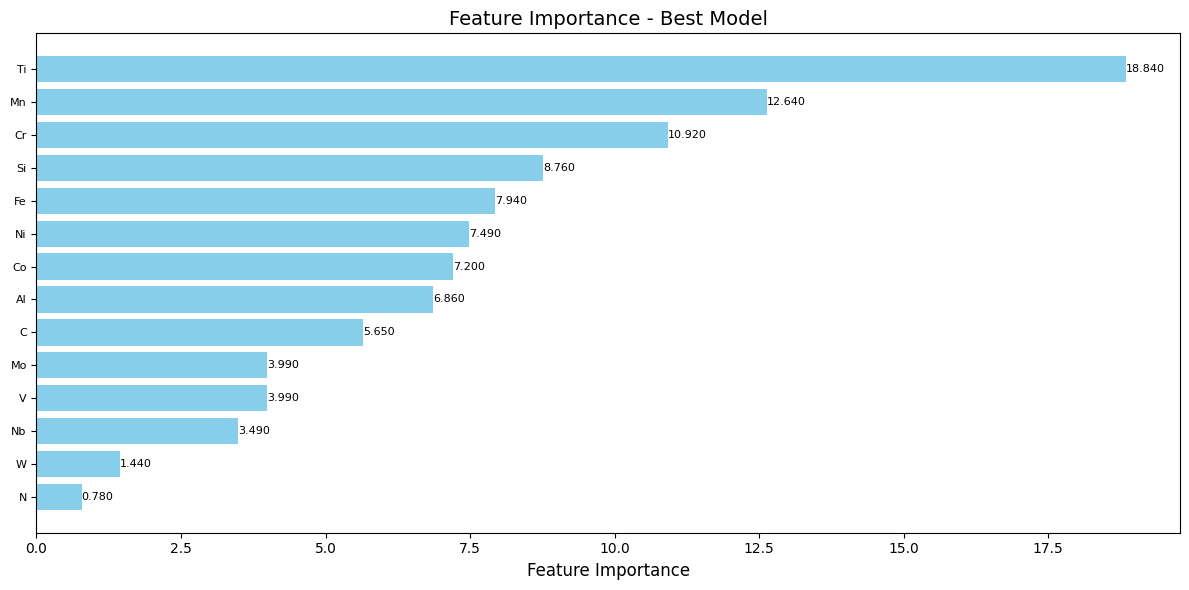

In [29]:
# Extract feature importance from trained Random Forest model
feature_importance = best_xgb.feature_importances_
feature_names = X_train.columns

# Create DataFrame for easier handling
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': (feature_importance * 100).round(2)
}).sort_values('importance', ascending=False)

# Plot ALL features with numbers on bars
plt.figure(figsize=(12, 6))  # Larger figure for all features
bars = plt.barh(range(len(importance_df)), importance_df['importance'], color='skyblue')

# Add numbers on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontsize=8)

plt.yticks(range(len(importance_df)), importance_df['feature'], fontsize=8)
plt.xlabel('Feature Importance', fontsize=12)
plt.title('Feature Importance - Best Model', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Shap Analysis of Best Model

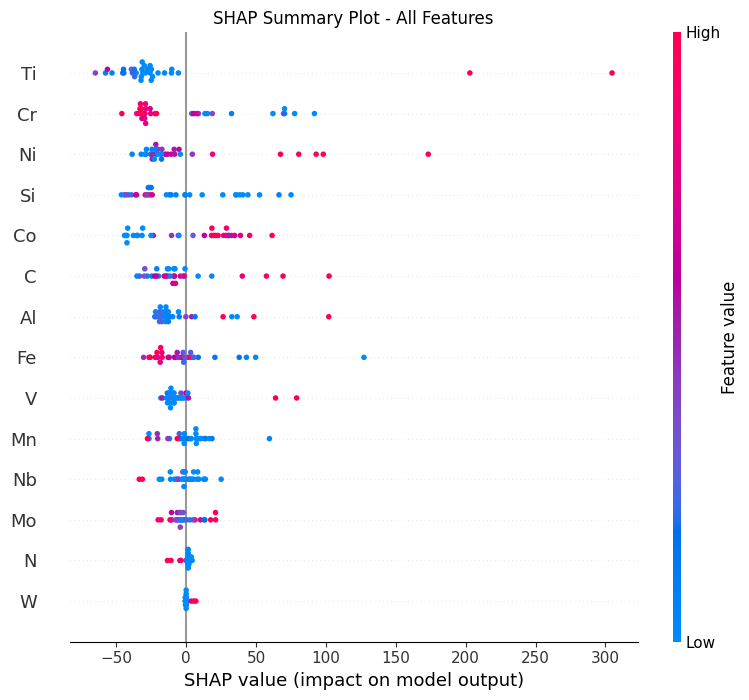

In [30]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert scaled data back to DataFrame for easier handling
X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns, index=X_test.index)

composition_cols = X_train.columns

# Create SHAP explainer
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_scaled)

# Plot 1: SHAP Summary Plot (shows feature importance + impact direction)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_df, plot_type="dot", show=False)
plt.title("SHAP Summary Plot - All Features")
plt.tight_layout()
plt.show()